In [5]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime
!pip install nltk

wall = pd.read_csv('reddit_wsb.csv')
#https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts 
#https://www.kaggle.com/gpreda/wallstreetbets-reddit-posts-analysis
#https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
#https://datavizcatalogue.com/search/time.html

C:\dev\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

ModuleNotFoundError: No module named 'wordcloud'

# Narrative

I was hired by a hedge fund to analyze Reddit post data, to try to pinpoint how and when new trends arise (which comments or users initiate actual movement on the stock market and actual trades. I'm trying to find the most popular topics, and words in the body of the post. I'm also trying to find the correlation between time and day and when a popular comments are posted. 

By analyzing the data can the hedge fund, get ahead of trends on reddit and thus maybe the markets. I'm looking to pinpoint the signal in the noise (who, when, and what).

# Data Wrangling

In [44]:
#check the head 
wall.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [45]:
#check info 
wall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37155 entries, 0 to 37154
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      37155 non-null  object 
 1   score      37155 non-null  int64  
 2   id         37155 non-null  object 
 3   url        37155 non-null  object 
 4   comms_num  37155 non-null  int64  
 5   created    37155 non-null  float64
 6   body       18718 non-null  object 
 7   timestamp  37155 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


In [46]:
#check data types ski_data.select_dtypes('object')
wall.select_dtypes('object')

,title,id,url,body,timestamp
0,"It's not about the money, it's about sending a...",l6ulcx,https://v.redd.it/6j75regs72e61,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,l6uibd,https://v.redd.it/ah50lyny62e61,NaN,2021-01-28 21:32:10
2,Exit the system,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,l6ugk6,https://sec.report/Document/0001193125-21-019848/,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,NaN,2021-01-28 21:26:56
...,...,...,...,...,...
37150,Could use some help here at the end of the day...,lt4i4u,https://i.redd.it/1rhnimof9vj61.jpg,NaN,2021-02-27 04:37:32
37151,The war has just begun,lt4fk0,https://v.redd.it/fcyia2xo8vj61,NaN,2021-02-27 04:34:21
37152,PSA: AMCX is not up because of AMC,lt4ci5,https://www.reddit.com/r/wallstreetbets/commen...,Tl;dr AMCX is a very undervalued company based...,2021-02-27 04:30:42
37153,Ape Combat 6: Liberation of Gamestopmeria,lt46qn,https://v.redd.it/x6b005am5vj61,NaN,2021-02-27 04:23:42


In [29]:
#look at all posts with "NaN" see if you should remove them
#ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
wall.isnull().sum()

title            0
score            0
id               0
url              0
comms_num        0
created          0
body         18437
timestamp        0
dtype: int64

In [ ]:
#find out how percent of missing "body" data
# 37155/8437 = 2.01524109128. This is almost half the data


missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

In [30]:
#list 'score' column by desc
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
#ski_data.loc[ski_data.SkiableTerrain_ac > 10000]

wall.sort_values(by='score', ascending=False)

,title,score,id,url,comms_num,created,body,timestamp
19162,Times Square right now,348241,l8rf4k,https://v.redd.it/x64z70f7eie61,11554,1.612058e+09,NaN,2021-01-31 04:00:38
16009,GME YOLO update — Jan 28 2021,225870,l78uct,https://i.redd.it/opzucppb15e61.png,23309,1.611897e+09,NaN,2021-01-29 07:06:23
17771,GME YOLO month-end update — Jan 2021,219779,l846a1,https://i.redd.it/r557em3t5ce61.png,20105,1.611983e+09,NaN,2021-01-30 07:04:45
34179,GME YOLO update — Feb 19 2021,201168,lnqgz8,https://i.redd.it/2xswz0h11ii61.png,12846,1.613798e+09,NaN,2021-02-20 07:05:55
18273,It’s treason then,195782,l881ia,https://i.redd.it/d3t66lv1yce61.jpg,4523,1.611992e+09,NaN,2021-01-30 09:40:59
...,...,...,...,...,...,...,...,...
23414,"Greatest transfer of wealth, you say",0,lbk4m0,https://www.reddit.com/r/wallstreetbets/commen...,25,1.612374e+09,To the hedge funds maybe.\n\nYou think that ho...,2021-02-03 19:43:51
35183,TC Energy (TRP.TO) making mad profits due to T...,0,lqzs0i,https://www.reddit.com/r/wallstreetbets/commen...,28,1.614160e+09,I will re-write this to r/WSB standards until ...,2021-02-24 11:42:18
31107,MPRT! Amazon partnership and still going for low!,0,ldoall,https://www.reddit.com/r/wallstreetbets/commen...,11,1.612609e+09,Any thoughts on it with the Amazon announcement?,2021-02-06 12:56:10
31108,CLOV is the New GME Change my mind! Hindenburg...,0,ldnk76,https://www.reddit.com/gallery/ldnk76,9,1.612606e+09,NaN,2021-02-06 12:14:50


In [20]:
#Extract time from timestamp add an EST time column 
#resource- https://www.w3resource.com/python/python-date-and-time.php 
wall['Time'] = pd.DatetimeIndex(wall['timestamp']).time

#change time format to EST 
wall.head()

,title,score,id,url,comms_num,created,body,timestamp,time,Time (EST),Date,Time
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,21:37:41,21:37:41,2021-01-28,21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,21:32:10,21:32:10,2021-01-28,21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,21:30:35,21:30:35,2021-01-28,21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,21:28:57,21:28:57,2021-01-28,21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,21:26:56,21:26:56,2021-01-28,21:26:56


In [21]:
#Drop the mistake time columns

wall.drop('time', inplace=True, axis=1)
wall.drop('Time', inplace=True, axis=1)

In [22]:
#Extract date from "timestamp" column and create "Date" column

wall['Date'] = pd.DatetimeIndex(wall['timestamp']).date

#change time format to EST 
wall.head()

,title,score,id,url,comms_num,created,body,timestamp,Time (EST),Date
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,21:37:41,2021-01-28
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,21:32:10,2021-01-28
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,21:30:35,2021-01-28
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,21:28:57,2021-01-28
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,21:26:56,2021-01-28


In [ ]:
#Code task 18#
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

In [ ]:
#how to check what data is missing

''''You know there are two columns that refer to price: 'AdultWeekend' and 'AdultWeekday'. You can calculate the number of 
price values missing per row. This will obviously have to be either 0, 1, or 2, where 0 denotes no price values are missing 
and 2 denotes that both are missing.'''

missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

#Code task 28#
#Use `missing_price` to remove rows from ski_data where both price values are missing

ski_data = ski_data[missing_price != 2]

In [ ]:
#look out for extreme values in the data



In [ ]:
#https://builtin.com/data-science/step-step-explanation-principal-component-analysis
#One way to disentangle this interconnected web of relationships is via principle components analysis (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

# Understanding Frequency and Popularity

In [35]:
#iterate over 'title' find consistent topics and aggregate them
#Use pandas' Series method `value_counts` to find any duplicated resort names
#ski_data['Name'].value_counts().head()
#ski_data['Region'].value_counts()
#use the `nunique` method to calculate, the number of unique values in each - !pip install pandas, ski_data[['Region', 'state']].nunique()

wall['title'].value_counts().head()

AMC              39
Robinhood        25
HOLD THE LINE    20
HOLD             16
NOK              15
Name: title, dtype: int64

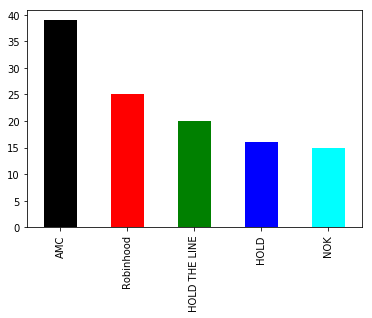

In [5]:
# Graph the most mentioned title 

wall['title'].value_counts().head().plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan']);

In [32]:
#see which topics scored the highest, top 10 scores
#(ski_data.Region!= ski_data.state).value_counts(),  ski_data['Region'].value_counts()

top_10_score = wall.nlargest(10,['score'])

print(top_10_score)

                                                   title   score      id  \
19162                             Times Square right now  348241  l8rf4k   
16009                      GME YOLO update — Jan 28 2021  225870  l78uct   
17771               GME YOLO month-end update — Jan 2021  219779  l846a1   
34179                      GME YOLO update — Feb 19 2021  201168  lnqgz8   
18273                                  It’s treason then  195782  l881ia   
18069  Used some of my GME tendies to buy Nintendo Sw...  192980  l8c0u4   
32168                   Wow super bowl commercial for us  191380  lexy8t   
18230                              That’s what I thought  175665  l890i7   
16220                      IT'S POWER TO THE TRADERS NOW  174401  l7feld   
18826  I am proud to do my part in paying forward our...  171778  l90oq6   

                                                     url  comms_num  \
19162                    https://v.redd.it/x64z70f7eie61      11554   
16009                

In [8]:
#find the top 10 scored posts that have a "body"

ski_data[ski_data['Name'] == 'Crystal Mountain']

#top_10_score_body = wall.nlargest(10,['score', 'body'!= 'NaN'])
#tom_and_42 = df[(df["Name"]=="Tom") & (df["Age"]==42)]

top_10_score_body = wall.nlargest(10,['score'] & wall.nlargest(10,['body'!= 'NaN'])

print(top_10_score_body)  

SyntaxError: invalid syntax (<ipython-input-8-fc86204547ad>, line 7)

In [ ]:
# Graph the top 10 posts with bodies of texts 


wall['title'].value_counts().head().plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan']);

In [4]:
#iterate over 'body' search for specific words and aggregate them

#We will use wordclouds to identify the most frequent words in the titles and body of the posts.
#code from wallstreet project on kaggle
#Title 

def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "fuck", "fucking"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    
    show_wordcloud(wall['title'], title = 'Prevalent words in titles')


In [5]:
#code from wallstreet project on kaggle
#Body

show_wordcloud(wall['body'], title = 'Prevalent words in post bodies')

NameError: name 'wall' is not defined

In [ ]:
#What seems to make a post ranked higher than others? 

In [ ]:
# calculate number of posts in an average month 

mean_headlines = round(np.mean(headline_counts))
print('Mean number of headlines in each month of Kaggle data:', mean_headlines)

# Timestamp Parsing and Correlation

In [ ]:
#what days of the week got the most posts?


In [ ]:
#What day of the week got most rated posts?

In [ ]:
#Scatterplot/Bokeh the correlation between days of the week and most posts and highest rated posts.
#scatterplot score v time v title 
#resource https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#Code task 36#
#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis

ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind= 'scatter');

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot('score', 'date', 'o', color='black');

In [ ]:
#what time during the day got the most posts?

top_posts = wall.nlargest(10,['score'] & wall.(10,['body'!= 'NaN'])

In [ ]:
#what time during the day were posts highly rated?
#score v time

top_posts = wall.nlargest(10,['score'] & wall.(10,['body'!= 'NaN'])
                                  
print(top_posts)  
 

column_1 = wall["score"]
column_2 = wall["Date"]
correlation = column_1.corr(column_2)                          

In [ ]:
#Scatterplot/Bokeh the correlation between time of the day and most posts and highest rated posts.

In [ ]:
#Is there a correlation between the words that showed up the most in the (body) and the time of day? (tope 10 words)?


In [ ]:
#Is there a correlation between the words that showed up the most in the (body) and the day of the week? (tope 10 words)?


In [ ]:
#Scatterplot/Bokeh the correlation between most used words in the (body) and the time and day.

# Vizualizations 

In [2]:
#title of posts

def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "fuck", "fucking"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    
    plt.show()

In [6]:
#body

show_wordcloud(wall['body'], title = 'Prevalent words in post bodies')

NameError: name 'STOPWORDS' is not defined

In [ ]:
#sentiment analysis body of texts
#change to body

# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"       
    
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()    def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()
    
df = data_df.loc[~data_df.body.isna()]
df['body_sentiment'] = df['body'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'body_sentiment', 'Body')    

# NLP Analyzation 

1. stemming
2. lemmatization
3. tokenization
4. stop word removal
4. frequency analysis

In [ ]:
#stemming
#https://www.geeksforgeeks.org/python-stemming-words-with-nltk/

# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
   
ps = PorterStemmer()
  
# choose some words to be stemmed
words = ["program", "programs", "programer", "programing", "programers"]
  
for w in words:
    print(w, " : ", ps.stem(w))

In [ ]:
#tokenization 

corpus = all_headlines_uniq

# Clean and tokenize using Keras' built-in Tokenizer() method
tokenizer = Tokenizer() # create the tokenizer
tokenizer.fit_on_texts(corpus) # fit the tokenizer on the documents

# convert data to sequence of tokens
input_sequences = [] # sequences of n-grams from all documents in the corpus
for headline in corpus:
    token_list = tokenizer.texts_to_sequences([headline])[0] # list of tokens corresponding to each word in the document (i.e., news headline)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1] # creates n-gram sequence (from 2 word n-grams, through n-grams = len(headline))
        input_sequences.append(n_gram_sequence)

print("Printing the first 5 input sequences...")
print(input_sequences[:10])

nb_samples = sum(len(s) for s in input_sequences) # total number of samples in input_sequences; 
print("\nTotal number of samples in input_sequences:", nb_samples)

# Vocab size
vocab_size = len(tokenizer.word_index) + 1
print("\nTotal number of words in the vocabulary:", vocab_size)

In [ ]:
#padding

max_sequence_len = max([len(s) for s in input_sequences]) # find length of the longest input sequence (i.e., headline)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) # pads the input sequences and converts to a numpy array (must fit model on np arrays)

In [ ]:
#stop word removal 

import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
# word_tokenize accepts
# a string as an input, not a file. 
stop_words = set(stopwords.words('english')) 
file1 = open("text.txt") 
  
# Use this to read file content as a stream: 
line = file1.read()
words = line.split() 
for r in words: 
    if not r in stop_words: 
        appendFile = open('filteredtext.txt','a') 
        appendFile.write(" "+r) 
        appendFile.close() 

In [ ]:
#frequency analysis 

# Web Scrapping 

1. Did posts correlate to real stock picking and market movements 
2. Can we track stock picks and retail buyers strategies based on reddit posts?
3. build ongoing scrapping attached to sentiment report- Quiver Quant’s Wall Street Bets Sentiment Tracker


In [ ]:
#Using API data
#https://seekingalpha.com/article/4407134-future-wallstreetbets-stocks-characteristics-of-meme-stocks
#https://bullish.news/wall-street-bets-next-big-trade/


def get_NYT_headlines(year, month):
    
    '''
     This function makes a request to the New York Times Archive API and collects 
     a list of article headlines for the specified month and year of interest.
    '''

    api_key = {'api-key' : pickle.load(open('apikey.pkl','rb'))}
    url = 'https://api.nytimes.com/svc/archive/v1/' + str(year) + '/' + str(month) + '.json'
    
    response = requests.get(url, params=api_key)
    output = response.json()
    
    docs = output['response']['docs']
    
    headlines = []
    for doc in docs:
        headlines.append(doc['headline']['main'])
    
    return headlines

In [ ]:
#web scraping code 
#https://towardsdatascience.com/stock-market-analysis-in-python-part-1-getting-data-by-web-scraping-cb0589aca178
#https://towardsdatascience.com/python-how-to-get-live-market-data-less-than-0-1-second-lag-c85ee280ed93

import requests # for http requests
from bs4 import BeautifulSoup # for html parsing and scraping
import bs4
from fastnumbers import isfloat 
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool 

import matplotlib.pyplot as plt
import seaborn as sns
import json
from tidylib import tidy_document # for tidying incorrect html

sns.set_style('whitegrid')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#String to float conversion

def ffloat(string):
    if string is None:
        return np.nan
    if type(string)==float or type(string)==np.float64:
        return string
    if type(string)==int or type(string)==np.int64:
        return string
    return fast_float(string.split(" ")[0].replace(',','').replace('%',''),
                      default=np.nan)
#or 

def ffloat_list(string_list):
    return list(map(ffloat,string_list))

#Removing Multple spaces from within string
def remove_multiple_spaces(string):
    if type(string)==str:
        return ' '.join(string.split())
    return string

#Making Http Requests
response = requests.get("http://www.example.com/", timeout=240)
response.status_code
response.content

#Getting Json content and parsing it
url = "https://jsonplaceholder.typicode.com/posts/1"
response = requests.get(url, timeout=240)
response.status_code
response.json()

content = page_response.json()
content.keys()

response.status_code

In [ ]:
#merge web scraping and API data 

all_headlines = kaggle_headlines + may_2018_rand
len(all_headlines)

# Modeling

In [ ]:
#modeling posts data 

## create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1] # label is the last word of each n-gram, and predictors are all the preceeding words
label = ku.to_categorical(label, num_classes=vocab_size) # one-hot encodes the labels; matrix dimension are the number of input sequences by the number of total words/tokens in the word dictionary


#use model to predict 

# Summary Questions

In your quest, you might need to ask a bunch of other questions, such as:

1. Can I count something interesting?

-I'm trying to find most popular words(topics) seen in the title and in the bodies of the Reddit posts. I'm also trying to find the correlation between what time and day that useful comments are posted. Can someone who's trying to get ahead of trends first in reddit to get ahead of trends in the markets, pinpoint the signal in the noise (who, when, and what). 


2. Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?


3. Can I make a bar plot or a histogram?

-Yes, correlation between popularity of topics and time of post

- Can I compare two related quantities?

- Can I make a scatterplot?

- Can I make a time-series plot?

- Looking at the plots, what are some insights I can make?

- Can I see any correlations?

- Is there a hypothesis I can - and should - investigate further?

- What other questions are the insights leading me to ask?


# Notes

In [ ]:
#plot frequency of topics brought up against the date and time 
#resources: https://datavizcatalogue.com/search/time.html

#subplots frequency of topics in topics against time and date- USE type

#plot topic versus scores see if theres any consistency there

#options

#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Region')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')

#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('state')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

# The next bit simply reorders the index by increasing average of weekday and weekend prices
# Compare the index order you get from
# state_price_means.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');


#Code task 18#
#Call ski_data's `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

#Use ski_data's `plot()` method to create a scatterplot (kind='scatter') with 'AdultWeekday' on the x-axis and
#'AdultWeekend' on the y-axis

ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind= 'scatter');

import matplotlib.pyplot as plt

#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('state')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
wall.score.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('score')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')

In [ ]:
#which words in the body showed up the most

#Sentence Tokenization

from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

#frequency distribution 

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>

#datetime changing code 

current_day = datetime.date.today()
print("\n Default Date Object:", current_day, "\n")
 
formatted_date = datetime.date.strftime(current_day, "%m/%d/%Y")
print("\n Formatted Date String:", formatted_date, "\n")


#split timestamp into a (MM/DD/YY) format, and a column for time in EST
#Use the .loc accessor again to modify this value with the correct value of 1819
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819
wall.loc

#Use pandas' Series' `replace()` method to replace anything within square brackets (including the brackets) - usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]


#transpose method of most talked about topics, but you can access this conveniently with the `T`: property.ski_data[ski_data.Name == 'Big Mountain Resort'].T

##Call ski_data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again

ski_data.describe().T

merg()

In [17]:
wall['title'].unique()

array(["It's not about the money, it's about sending a message. 🚀💎🙌",
       'Math Professor Scott Steiner says the numbers spell DISASTER for Gamestop shorts',
       'Exit the system', ..., 'PSA: AMCX is not up because of AMC',
       'Ape Combat 6: Liberation of Gamestopmeria',
       'A Slap Back to Reality'], dtype=object)

In [ ]:
wall.['title'].

In [20]:
wall.sort_values(by='title', ascending=False)

,title,score,id,url,comms_num,created,body,timestamp
5437,🪰 ME TO THE 🌝 $AAL 🛫📈,0,l6zjuc,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611876e+09,NaN,2021-01-29 01:23:38
7031,🩸🩸🩸THIS IS WHEN WE MUST HOLD AND STAND TALL......,1,l708dz,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611878e+09,If everyone likes a football team they go BUY ...,2021-01-29 01:47:19
8813,🩸 🩸 🩸 RATE THEM DOWN ON GOOGLE PLAY / APP STORE,1,l70xg4,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611879e+09,Upvote so more people see it. Robinhood and th...,2021-01-29 02:13:13
8491,🩸 🩸 🩸 RATE THEM DOWN ON GOOGLE PLAY / APP STORE,1,l70l1c,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611878e+09,Upvote so more people see it. Robinhood and th...,2021-01-29 02:00:29
10208,🩸 🩸 🩸 RATE THEM DOWN ON GOOGLE PLAY / APP STORE,1,l71evw,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611880e+09,Upvote so more people see it. Robinhood and th...,2021-01-29 02:29:48
...,...,...,...,...,...,...,...,...
20834,!!!! HOLD HOLD HOLD !!!! Buy the dip !!,160,laonm1,https://www.reddit.com/r/wallstreetbets/commen...,34,1.612273e+09,I am new here but I had AMC and GME when the p...,2021-02-02 15:41:58
10706,!!!!,1,l71a9q,https://i.redd.it/sb05b2pan3e61.png,0,1.611880e+09,NaN,2021-01-29 02:25:34
4854,"!!! CHAMATH, Please open your own trading plat...",4,l6ziga,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611876e+09,Wall street bets is getting shutdown.\n\nLess...,2021-01-29 01:22:18
3794,"!!! CHAMATH, Please open your own trading plat...",6,l6zdyh,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611876e+09,Wall street bets is getting shutdown.\n\nLess...,2021-01-29 01:17:58


In [24]:
#aggregate certain topics together

#wall['title'].find('chamath')

#wall['title'] = wall.text.str.findall('chamath')

wall.findall('chamath')

AttributeError: 'DataFrame' object has no attribute 'findall'

In [ ]:
#sort all titles and aggregate the topics
#show how often certain topics are brought up

In [ ]:
#than show how with these comments, at what point did they become more frequent, use dates, 
# what times were most of these comments made



In [ ]:
wall['body'].unique()

In [ ]:
# reset the index
properties_T = properties_T.reset_index()

In [14]:
import numpy as np 

np.transpose

wall_T = wall.T

#assign the values of the first row to your column headings

df.columns = df.iloc[1]
wall_T.head() 

NameError: name 'df' is not defined

In [9]:
#Sentiment analysis, With nltk SentimentIntensityAnalyzer
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
#Title

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"   
    
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()
    
data_df['title_sentiment'] = data_df['title'].apply(lambda x: find_sentiment(x))
plot_sentiment(data_df, 'title_sentiment', 'Title')    

C:\dev\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  Searched in:
    - 'C:\\Users\\Allegra Grunberg/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\dev\\nltk_data'
    - 'C:\\dev\\share\\nltk_data'
    - 'C:\\dev\\lib\\nltk_data'
    - 'C:\\Users\\Allegra Grunberg\\AppData\\Roaming\\nltk_data'
    - ''
**********************************************************************
